# IE Predictor Model

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path

from config import driver, username, password, host, port, database
from sqlalchemy import create_engine

In [2]:
connection_string = f"{driver}://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)
connection = engine.connect()

In [ ]:
QuestionsListDF = pd.read_sql_table('questionslist', connection)
QuestionsListDF.head()

In [3]:
# pd.options.display.max_columns = 300
# pd.options.display.max_columns = 100
pd.options.display.max_columns = 20

In [4]:
# local csv file read

QuestionnaireDF = pd.read_csv(Path('../resources/data.csv'), delimiter='\t')
QuestionnaireDF.rename(columns ={'country':'COUNTRY', 
                                 'dateload':'DATELOAD',
                                 'introelapse':'INTROELAPSE',
                                 'testelapse':'TESTELAPSE',
                                 'surveyelapse':'SURVEYELAPSE',
                                 'gender':'GENDER',
                                 'engnat':'ENGNAT',
                                 'age':'AGE',
                                 'IE':'INTROVERT_EXTROVERT'}, inplace=True)
QuestionnaireDF.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91E,COUNTRY,DATELOAD,INTROELAPSE,TESTELAPSE,SURVEYELAPSE,GENDER,ENGNAT,AGE,INTROVERT_EXTROVERT
0,5,51,7107,3,91,2522,1,56,6180,2,...,4609,US,2019-02-20 17:35:52,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,10409,AU,2019-02-20 17:46:32,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,2691,BR,2019-02-20 18:10:24,56,306,17,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3697,CZ,2019-02-20 18:16:21,2,287,14,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,1662,CA,2019-02-20 18:21:49,2,325,12,1,1,18,2


In [7]:
QuestionnaireDF['GENDER'].sort_values().unique()

array([0, 1, 2, 3])

In [ ]:
# Read from AWS

# QuestionnaireDF = pd.read_sql_table('questionnaire', connection)
# QuestionnaireDF.head()

## Steps to be performed

Preprocessing - 
1) Age cleanup - Henry - COMPLETED
2) Elimiating unnecessary Features - Collaboration - COMPLETED - Since 

Question:
1) Introvert = 1, Extrovert = 2, Ambivert = 3 ---> Use Introvert and Extrovert data to train and test the model... Consider None 3 as Ambivert.

Readme: - Collaborated

Presentation: - Collaborated
1) work with 2 class members for Introvert and Extravert

Flask: - Henry
1) Connectivity to AWS DB - Complete
2) Query AWS DB - Pull Question from Backend that feeds into HTML - Use as applicable


Html: - Scott
1) Load HTML Pages from the Tableau Public or from Images
    - Demographics page from Tableau
2) Input Form for the questions - May include Javascript


Machine learning - Collaborated
0) Scale the data
1) RandomForestClassifier --> feature importance
2) Logistic Regression
3) Linear Regression
4) Unsupervised learning --> K-Means Clustering


Visualizations - Henry
1) top questions where people are consistently either 1 or 5 about their responses
2) Introvert Vs Extrovert Vs NotToIdentify - Male Vs Female
3) Demographics ( Example - Age, Gender, Country %age, english speaking vs No)
3a) Age-wise question --> Introvert Vs Extrovert by millenials (demographics) 
3B) Inspect Countries --> Has NONE value  -> Consider them as Other --> Eliminate Countries from training - Scott
1) Identifying the millenials age groups - Scott 
4) Boxplot - of lapsed time

## Preprocessing - Provide output as CleansedDF

In [8]:
QuestionnaireDF = QuestionnaireDF.loc[QuestionnaireDF['INTROVERT_EXTROVERT'] != 0]
QuestionnaireDF

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91E,COUNTRY,DATELOAD,INTROELAPSE,TESTELAPSE,SURVEYELAPSE,GENDER,ENGNAT,AGE,INTROVERT_EXTROVERT
0,5,51,7107,3,91,2522,1,56,6180,2,...,4609,US,2019-02-20 17:35:52,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,10409,AU,2019-02-20 17:46:32,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,2691,BR,2019-02-20 18:10:24,56,306,17,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3697,CZ,2019-02-20 18:16:21,2,287,14,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,1662,CA,2019-02-20 18:21:49,2,325,12,1,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,46,1328,4,82,3214,4,43,3360,5,...,3495,US,2019-08-19 12:54:22,8,299,14,2,1,53,1
7184,2,5,8786,5,24,2233,5,10,10387,5,...,6088,CA,2019-08-19 13:10:30,25,498,20,1,1,20,1
7185,3,29,6618,5,44,2393,4,58,5768,5,...,3425,BY,2019-08-19 13:29:47,3,326,17,2,2,28,1
7186,4,15,8321,2,18,6179,5,60,5037,1,...,17416,CA,2019-08-19 15:19:35,3,414,23,2,1,19,1


In [9]:
QuestionnaireDF = QuestionnaireDF.drop(columns=['COUNTRY', 'DATELOAD', 'INTROELAPSE', 'TESTELAPSE', 'SURVEYELAPSE'])
QuestionnaireDF.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q90A,Q90I,Q90E,Q91A,Q91I,Q91E,GENDER,ENGNAT,AGE,INTROVERT_EXTROVERT
0,5,51,7107,3,91,2522,1,56,6180,2,...,3,40,4648,3,35,4609,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,4,28,3884,3,1,10409,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,1,87,1759,1,19,2691,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3,15,2345,3,23,3697,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,5,86,6413,5,69,1662,1,1,18,2


In [10]:
QuestionnaireDF['AGE'].sort_values().unique()

array([     14,      15,      16,      17,      18,      19,      20,
            21,      22,      23,      24,      25,      26,      27,
            28,      29,      30,      31,      32,      33,      34,
            35,      36,      37,      38,      39,      40,      41,
            42,      43,      44,      45,      46,      47,      48,
            49,      50,      51,      52,      53,      54,      55,
            56,      57,      58,      59,      60,      61,      62,
            63,      64,      65,      66,      67,      68,      69,
            70,      71,      72,      73,      75,      77,      78,
            79,      81,      90,     255,    1979,    1983,    1990,
          1991,    1996,    1999,    2003, 8675309])

In [11]:
# Define variables for cleaning age feature.  Drop rows with age above max_age, make age bins of size age_bin_interval
max_age = 100
# Age: Clean up invalid rows where age is above max_age
age_range = (QuestionnaireDF['AGE'] < max_age)
QuestionnaireDF = QuestionnaireDF.loc[age_range]

In [12]:
QuestionnaireDF['AGE'].sort_values().unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77, 78, 79, 81, 90])

In [13]:
ColumnsList = QuestionnaireDF.columns.to_list()

In [ ]:
# elapsedTimeColumnsList = []
# for column in ColumnsList:
#     if (column[0] == 'Q' and column[-1] == 'E'):
#         elapsedTimeColumnsList.append(column)
        
# elapsedTimeColumnsList   

In [ ]:
# elapsedTimeColumnsDF = QuestionnaireDF[['Q1E', 'Q2E', 'Q3E', 'Q4E', 'Q5E']]
# elapsedTimeColumnsDF = QuestionnaireDF[elapsedTimeColumnsList]
# elapsedTimeColumnsDF.head()

In [ ]:
# 1 Minute = 60 Seconds = 60,000 Milliseconds
# Identify all rows that have atleast one response time more than 1 minute

# elapsedTimeColumnsDF['Q1E'].loc[lambda x : x > 60000]
# outliersDF = elapsedTimeColumnsDF[elapsedTimeColumnsDF.gt(60000).any(axis=1)]
# outliersDF

In [ ]:
# outliersinSecondsDF=outliersDF/1000
# outliersinSecondsDF

In [14]:
surveyResponseColumnsList = []
for column in ColumnsList:
    if (column[0] == 'Q' and column[-1] == 'A'):
        surveyResponseColumnsList.append(column)

In [15]:
#Final Cleansed DF for Machine Learning
CleansedDF = QuestionnaireDF[surveyResponseColumnsList].copy()
CleansedDF['GENDER'] = QuestionnaireDF['GENDER']
CleansedDF['ENGNAT'] = QuestionnaireDF['ENGNAT']
CleansedDF['AGE'] = QuestionnaireDF['AGE']
CleansedDF['INTROVERT_EXTROVERT'] = QuestionnaireDF['INTROVERT_EXTROVERT']

CleansedDF

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,GENDER,ENGNAT,AGE,INTROVERT_EXTROVERT
0,5,3,1,2,3,2,3,3,4,5,...,4,2,5,4,3,3,2,1,23,3
1,5,5,1,5,2,2,5,2,1,3,...,1,3,4,4,4,3,1,2,25,2
2,3,4,5,3,4,5,5,5,5,5,...,4,5,3,2,1,1,1,2,19,1
3,5,2,1,1,5,5,5,4,4,2,...,3,5,4,4,3,3,1,1,23,1
4,1,2,1,1,3,3,5,1,3,4,...,3,1,2,5,5,5,1,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,4,4,5,5,4,4,4,4,4,...,4,3,4,2,5,4,2,1,53,1
7184,2,5,5,5,4,4,5,5,4,3,...,5,4,3,1,3,2,1,1,20,1
7185,3,5,4,5,5,5,4,5,5,5,...,4,5,3,1,1,1,2,2,28,1
7186,4,2,5,1,5,1,5,4,5,1,...,4,1,1,4,5,2,2,1,19,1


## Start Machine learning - Runs based on CleansedDF

In [ ]:
CleansedDF

In [17]:
X = CleansedDF.drop(columns=['INTROVERT_EXTROVERT'])
X

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,GENDER,ENGNAT,AGE
0,5,3,1,2,3,2,3,3,4,5,...,1,4,2,5,4,3,3,2,1,23
1,5,5,1,5,2,2,5,2,1,3,...,2,1,3,4,4,4,3,1,2,25
2,3,4,5,3,4,5,5,5,5,5,...,5,4,5,3,2,1,1,1,2,19
3,5,2,1,1,5,5,5,4,4,2,...,5,3,5,4,4,3,3,1,1,23
4,1,2,1,1,3,3,5,1,3,4,...,1,3,1,2,5,5,5,1,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,4,4,5,5,4,4,4,4,4,...,3,4,3,4,2,5,4,2,1,53
7184,2,5,5,5,4,4,5,5,4,3,...,4,5,4,3,1,3,2,1,1,20
7185,3,5,4,5,5,5,4,5,5,5,...,5,4,5,3,1,1,1,2,2,28
7186,4,2,5,1,5,1,5,4,5,1,...,1,4,1,1,4,5,2,2,1,19


In [18]:
y = CleansedDF['INTROVERT_EXTROVERT']
y

0       3
1       2
2       1
3       1
4       2
       ..
7183    1
7184    1
7185    1
7186    1
7187    1
Name: INTROVERT_EXTROVERT, Length: 7153, dtype: int64

## KMeans Analysis (Unsupervised Learning)
Attempt to make clusters out of the dataset to identify possible cluster groupings.  Use CleansedDF in order to include the self-identification of the survey participants.

In [19]:
from sklearn.cluster import KMeans

In [20]:
# Indicate number of assumed clusters.  Use X without the labels to fit/predict
k = 5
kmeans = KMeans(n_clusters=k, random_state = 42)
predictions = kmeans.fit_predict(X)
print(predictions)

[2 2 1 ... 4 1 2]


In [21]:
predictions

array([2, 2, 1, ..., 4, 1, 2], dtype=int32)

In [22]:
predictions is kmeans.labels_

True

In [23]:
kmeans.cluster_centers_

array([[ 3.80418251,  3.53422053,  2.89543726,  3.7661597 ,  3.47148289,
         3.23764259,  4.01140684,  2.8365019 ,  3.51330798,  4.18441065,
         2.26235741,  3.7338403 ,  3.16920152,  1.80038023,  3.18060837,
         1.96768061,  2.57224335,  3.44106464,  2.03802281,  1.94676806,
         2.72053232,  3.13688213,  3.40874525,  1.86692015,  3.73954373,
         3.62547529,  2.29847909,  3.09695817,  1.98098859,  2.0095057 ,
         2.86121673,  2.14258555,  3.08365019,  2.68821293,  3.73764259,
         2.73193916,  2.56844106,  3.40684411,  2.50190114,  2.60076046,
         3.38973384,  3.51140684,  3.38212928,  3.52281369,  2.29657795,
         3.37072243,  2.31368821,  2.56463878,  2.9391635 ,  2.9904943 ,
         2.72243346,  2.32509506,  3.03612167,  3.08935361,  2.23003802,
         2.76806084,  3.55323194,  2.76806084,  3.47338403,  3.00570342,
         3.2243346 ,  2.24334601,  2.4391635 ,  3.03231939,  2.97718631,
         2.0608365 ,  2.89163498,  3.16159696,  3.1

In [24]:
X["class"] = kmeans.labels_
X.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,GENDER,ENGNAT,AGE,class
0,5,3,1,2,3,2,3,3,4,5,...,4,2,5,4,3,3,2,1,23,2
1,5,5,1,5,2,2,5,2,1,3,...,1,3,4,4,4,3,1,2,25,2
2,3,4,5,3,4,5,5,5,5,5,...,4,5,3,2,1,1,1,2,19,1
3,5,2,1,1,5,5,5,4,4,2,...,3,5,4,4,3,3,1,1,23,1
4,1,2,1,1,3,3,5,1,3,4,...,3,1,2,5,5,5,1,1,18,2


In [25]:
import matplotlib.pyplot as plt

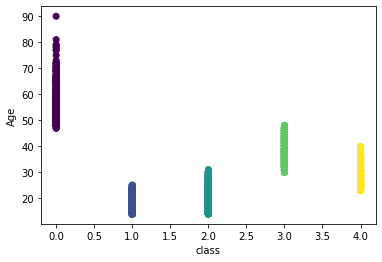

In [28]:
plt.scatter(x=X["class"], y=X['AGE'], c=X['class'])
plt.xlabel('class')
plt.ylabel('Age')
plt.show()